In [ ]:
# Imports
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read external resource data
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One Hot encoding non-numerical values into numerical values
insurance_one_hot = pd.get_dummies(insurance_data)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### ⚫ Model 


In [ ]:
# Creation of the X & Y value
X = insurance_one_hot.drop(columns=['charges'])
Y = insurance_one_hot['charges']

In [ ]:
# Categorization of Data into 3 segments
insurance_train = X[:1070]
insurance_test = X[1070:] 

In [ ]:
# Alternately use
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [ ]:
# Model Creation
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Model Compilation
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

# Model Fit
history = insurance_model.fit(x_train, y_train, epochs=400 , verbose=0)


Epoch 1/400
34/34 [==============================] - 1s 4ms/step - loss: 12560.8730 - mae: 12560.8730
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 7726.8374 - mae: 7726.8374
Epoch 3/400
34/34 [==============================] - 0s 4ms/step - loss: 7252.3286 - mae: 7252.3286
Epoch 4/400
34/34 [==============================] - 0s 4ms/step - loss: 7091.4751 - mae: 7091.4751
Epoch 5/400
34/34 [==============================] - 0s 4ms/step - loss: 6947.9546 - mae: 6947.9546
Epoch 6/400
34/34 [==============================] - 0s 4ms/step - loss: 6787.8535 - mae: 6787.8535
Epoch 7/400
34/34 [==============================] - 0s 4ms/step - loss: 6702.3823 - mae: 6702.3823
Epoch 8/400
34/34 [==============================] - 0s 4ms/step - loss: 6620.3960 - mae: 6620.3960
Epoch 9/400
34/34 [==============================] - 0s 4ms/step - loss: 6590.6099 - mae: 6590.6099
Epoch 10/400
34/34 [==============================] - 0s 4ms/step - loss: 6545.8921 - mae: 6545.89

In [ ]:
y_pred = insurance_model.predict(x_test)
y_test = tf.reshape(y_test, shape=(268,1))
mean = tf.reduce_mean(y_test)
mae = tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_test), y_pred=tf.squeeze(y_pred))
print(1-(mae.numpy()/mean.numpy())) # Percentage Accuracy

0.894879463265245


### ⚫ Improving Model

Early stopping callback to understand how many epochs must an algorithm train for

Text(0.5, 0, 'epochs')

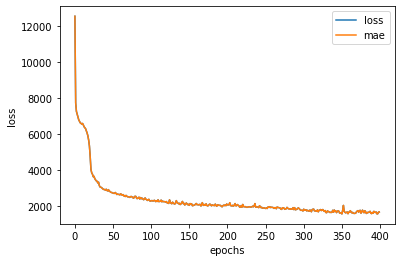

In [ ]:
 # Plot history
 pd.DataFrame(history.history).plot()
 plt.ylabel('loss')
 plt.xlabel('epochs')   

### ⚫ Preprocessing Data (Normalization & Standardization)

**Normalization:** Turn numerical values in data set to a common scale. Converts Values between 0 and 1 while preserving the original distribution

**Standardization:** Removes the mean and divides each value by the standdard deviation


In [ ]:
# Imports
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
# CSV read and Seed setting
tf.random.set_seed(42)
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# Column  Transformer & One Hot Encoding
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # converts numerical values to a range 
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']) # converts non numerical values into a tuple valued binary
)

In [ ]:
#  Data splitting
X = insurance_data.drop(columns=['charges'])
Y = insurance_data['charges']
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
ct.fit(x_train)

# Transform training and test data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

(1070, 11)

In [ ]:
# Model creation
insurance_model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
])

# Model compilation
insurance_model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.025),
    metrics=['mae'] 
)

# Model Fitting
insurance_model_1.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8364.9453 - mae: 8364.9453
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 4480.5674 - mae: 4480.5674
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 3501.6985 - mae: 3501.6985
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 3257.1211 - mae: 3257.1211
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 2975.2822 - mae: 2975.2822
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 3008.5454 - mae: 3008.5454
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 2765.9194 - mae: 2765.9194
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 2756.2515 - mae: 2756.2515
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 2248.7146 - mae: 2248.7146
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 2266.3015 - mae: 2266.3015

In [ ]:
insurance_model_1.predict(x_test_normal)

array([[ 9158.285 ],
       [ 4970.68  ],
       [27827.092 ],
       [ 8972.981 ],
       [30485.383 ],
       [ 4296.28  ],
       [ 1942.5696],
       [13969.064 ],
       [ 3693.5208],
       [ 9957.227 ],
       [17819.998 ],
       [ 6900.7197],
       [ 3785.4744],
       [46748.082 ],
       [48945.008 ],
       [45082.453 ],
       [ 9598.95  ],
       [43934.48  ],
       [ 8099.2803],
       [21917.701 ],
       [ 4793.7446],
       [ 7083.7764],
       [ 1164.7885],
       [ 2640.7283],
       [10768.068 ],
       [11072.73  ],
       [12223.986 ],
       [ 4954.5674],
       [ 9807.912 ],
       [ 1164.7885],
       [ 7790.918 ],
       [11579.016 ],
       [ 1860.5433],
       [ 5481.394 ],
       [ 2646.6018],
       [ 7587.205 ],
       [ 2311.9373],
       [ 7036.32  ],
       [23321.592 ],
       [39861.6   ],
       [ 4285.057 ],
       [ 2358.332 ],
       [11257.822 ],
       [11958.898 ],
       [ 4631.935 ],
       [11928.531 ],
       [ 3313.8438],
       [ 4180

In [ ]:
insurance_model_1.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1613.8425 - mae: 1613.8425


[1613.842529296875, 1613.842529296875]